In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h2> Učitavanje skupa podataka i generalni uvid u podatke </h2>

In [3]:
# učitavanje podataka
mydateparser = lambda c: pd.to_datetime(c, format='%d.%m.%Y', errors='coerce')
df = pd.read_csv('training_dataset_enc.csv', parse_dates=['DATUM_IZVJESTAVANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'DATUM_OTVARANJA', 'DATUM_ZATVARANJA'], date_parser=mydateparser)

In [4]:
# brisanje nepotrebnih stupaca 
del df['Unnamed: 0']; del df['Unnamed: 0.1']; 

In [5]:
df.shape

(5193124, 17)

In [6]:
df.head()

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
0,2013-12-31,412140,7146814,2012-08-27,2018-04-30,NaT,629155.97,639373.81,641562.01,2,1420,TM0109,L,1.50,A,22,N
1,2013-12-31,772139,5521579,2010-06-11,2017-06-30,NaT,46000.00,28481.94,26887.19,1,1410,FL0801,A,9.70,B,38,N
2,2013-12-31,481985,7443823,2013-01-23,2018-02-28,NaT,44679.50,44908.40,45062.09,2,1550,FD0100,L,3.10,A,37,N
3,2013-12-31,139014,6511639,2011-09-16,2016-09-30,NaT,29959.15,19691.64,18285.89,2,1410,FL0801,A,7.95,B,49,N
4,2013-12-31,952566,6143123,2011-05-23,2014-05-31,NaT,100000.00,24797.93,15685.33,1,1410,FL0801,A,9.70,B,35,N


In [7]:
df.describe()

,KLIJENT_ID,OZNAKA_PARTIJE,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST
count,5.193124e+06,5.193124e+06,5.193124e+06,4.772056e+06,5.193124e+06,5.193124e+06,5.193124e+06,5.141422e+06,5.193124e+06
mean,7.207398e+05,7.152089e+06,2.554007e+05,1.309054e+05,1.181028e+05,1.682643e+00,1.426380e+03,5.562767e+00,4.141305e+01
std,1.160615e+07,8.765659e+06,3.784332e+06,1.950900e+06,1.829336e+06,8.221024e-01,6.029030e+01,3.760118e+00,2.045255e+02
min,1.002000e+03,1.630070e+05,0.000000e+00,-5.981000e+01,-5.981000e+01,1.000000e+00,1.110000e+03,-4.000000e-03,-7.994000e+03
25%,3.708580e+05,4.275223e+06,2.956673e+04,6.897520e+03,4.032975e+02,1.000000e+00,1.410000e+03,2.350000e+00,3.500000e+01
50%,6.930290e+05,6.603912e+06,6.422751e+04,3.339354e+04,2.673879e+04,2.000000e+00,1.410000e+03,6.480000e+00,4.600000e+01
75%,1.033071e+06,9.142953e+06,1.150000e+05,8.280279e+04,7.627030e+04,2.000000e+00,1.410000e+03,8.740000e+00,5.700000e+01
max,9.991411e+09,1.136257e+08,6.055048e+08,6.105662e+08,6.105662e+08,5.000000e+00,1.610000e+03,8.080000e+01,9.080000e+02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193124 entries, 0 to 5193123
Data columns (total 17 columns):
DATUM_IZVJESTAVANJA               datetime64[ns]
KLIJENT_ID                        int64
OZNAKA_PARTIJE                    int64
DATUM_OTVARANJA                   datetime64[ns]
PLANIRANI_DATUM_ZATVARANJA        datetime64[ns]
DATUM_ZATVARANJA                  datetime64[ns]
UGOVORENI_IZNOS                   float64
STANJE_NA_KRAJU_PRETH_KVARTALA    float64
STANJE_NA_KRAJU_KVARTALA          float64
VALUTA                            int64
VRSTA_KLIJENTA                    int64
PROIZVOD                          object
VRSTA_PROIZVODA                   object
VISINA_KAMATE                     float64
TIP_KAMATE                        object
STAROST                           int64
PRIJEVREMENI_RASKID               object
dtypes: datetime64[ns](4), float64(4), int64(5), object(4)
memory usage: 673.5+ MB


<h2> Data preprocessing </h2>

Ciljna značajka je varijabla 'PRIJEVREMENI_RASKID'. Problem na kojem radimo je (binarni) klasifikacijski problem; ciljna značajka može poprimiti vrijednost 'Y' ili 'N'.   

Primjećujemo da u stupcu 'STAROST' postoje netipične vrijednosti kao što su negativne vrijednosti i vrijednosti veće od 900. Rečeno nam je da to znači da podatak nije dostupan, tj. vrlo vjerojatno se radi o pravnoj osobi pa ćemo postaviti te vrijednosti na -1 i eventualno kasnije promijeniti kada uočimo koji od klijenata su pravne osobe. Npr. mogli bismo te netipične vrijednosti postaviti na prosjek starosti pravnih osoba (tvrtki). 

In [9]:
df['STAROST'].values[df['STAROST'].values >= 900] = -1
df['STAROST'].values[df['STAROST'].values < 0] = -1

In [10]:
# istražujemo kategoričke varijable 
columns = ['VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA','TIP_KAMATE', 'PRIJEVREMENI_RASKID'];
for column_name in columns:
    print(column_name,': ', sorted(df[column_name].unique()))

VALUTA :  [1, 2, 3, 4, 5]
VRSTA_KLIJENTA :  [1110, 1120, 1210, 1310, 1320, 1330, 1350, 1410, 1420, 1430, 1510, 1550, 1610]
PROIZVOD :  ['FD0100', 'FD0200', 'FE0100', 'FE0200', 'FI0500', 'FL0201', 'FL0202', 'FL0600', 'FL0801', 'FL0802', 'FL0803', 'FL0804', 'FL0900', 'FL0901', 'FL1100', 'FL1200', 'FL1201', 'FL1202', 'FL1301', 'FL1304', 'FL1306', 'FL1309', 'FL1310', 'FL1400', 'FL1500', 'FL1600', 'FP0100', 'FS0200', 'TM0102', 'TM0104', 'TM0109', 'TM0500']
VRSTA_PROIZVODA :  ['A', 'L']
TIP_KAMATE :  ['A', 'B', 'C', 'D']
PRIJEVREMENI_RASKID :  ['N', 'Y']


Partneri Mozgala koji su smislili zadatak su naknadno objavili napomenu o vrijednostima ciljne značajke. U njihovom evaluacijskom i validacijskom skupu smatrat će se da je ugovor prijevremeno raskinut ukoliko je zatvoren najkasnije 10 dana prije planiranog datuma zatvaranja.

In [11]:
df['PRIJEVREMENI_RASKID'] = np.where(df['DATUM_ZATVARANJA']>=(df['PLANIRANI_DATUM_ZATVARANJA']- np.timedelta64(10, 'D')), 'N', df['PRIJEVREMENI_RASKID'])

<h3> (Ne)Balansiranost skupa podataka </h3>

In [12]:
prekidi = df.loc[df['PRIJEVREMENI_RASKID']=='Y']
prekidi_group = prekidi.groupby(['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'])
len1 = len(prekidi_group);
print('Broj prijevremenih raskida: ', len1)

sve_grupe = df.groupby(['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'])
len2 = len(sve_grupe);
print('Ukupan broj ugovora: ', len2)
print('Postotak prijevremenih raskida u datasetu: ', len1/len2 )

Broj prijevremenih raskida:  153935
Ukupan broj ugovora:  950239
Postotak prijevremenih raskida u datasetu:  0.1619960873001424


Kako je postotak prijevremenih raskida u skupu podataka otprilike 16%, zaključujemo da je dataset nebalansiran pa moramo to uzeti u obzir pri odabiru ML modela.

<h3>Missing values </h3>

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

DATUM_IZVJESTAVANJA                     0
KLIJENT_ID                              0
OZNAKA_PARTIJE                          0
DATUM_OTVARANJA                         0
PLANIRANI_DATUM_ZATVARANJA         421129
DATUM_ZATVARANJA                  3978638
UGOVORENI_IZNOS                         0
STANJE_NA_KRAJU_PRETH_KVARTALA     421068
STANJE_NA_KRAJU_KVARTALA                0
VALUTA                                  0
VRSTA_KLIJENTA                          0
PROIZVOD                                0
VRSTA_PROIZVODA                         0
VISINA_KAMATE                       51702
TIP_KAMATE                              0
STAROST                                 0
PRIJEVREMENI_RASKID                     0
dtype: int64


In [17]:
missing_values['DATUM_ZATVARANJA'] / df.shape[0]

0.7661357595158521

Budući da je otprilike 77% podataka u stupcu 'DATUM_ZATVARANJA' nepoznato, razmotrit ćemo brisanje tog stupca. Trenutačno nam je još možda potreban zbog daljnjeg čišćenja podataka (skup podataka je dosta nečist i ima nelogičnosti u podacima). Ukoliko nam je 'DATUM_ZATVARANJA' potreban u daljnjoj analizi npr. zbog trajanja ugovora, to možemo iščitati iz izvještavanja.

In [18]:
# del df['DATUM_ZATVARANJA']

Primijetile smo da se visine kamata razlikuju ovisno o tipu kamate, vrsti klijenta i vrsti proizvoda pa ovisno o tome u ovom dijelu računamo prosjek visina kamata kako bismo to iskoristile u popunjavanju nepoznatih vrijednosti u stupcu 'VISINA_KAMATE'.



In [21]:
tip_kamate = df['TIP_KAMATE'].unique().tolist()
vrsta_proizvoda = df['VRSTA_PROIZVODA'].unique().tolist()
vrsta_klijenta = df['VRSTA_KLIJENTA'].unique().tolist()
prosjeci = np.zeros(shape=(len(tip_kamate), len(vrsta_proizvoda), len(vrsta_klijenta)))


for i in range(0, len(tip_kamate)):
    for j in range(0, len(vrsta_proizvoda)):
        for k in range(0, len(vrsta_klijenta)):
            izdvojeni_krediti = df.loc[ (df['TIP_KAMATE'] == tip_kamate[i]) & (df['VRSTA_PROIZVODA'] == vrsta_proizvoda[j]) & (df['VRSTA_KLIJENTA'] == vrsta_klijenta[k]) ]
            visine_kamata = izdvojeni_krediti['VISINA_KAMATE']
            if(len(visine_kamata)):
                prosjeci[i,j,k] = visine_kamata.mean()

print('Tipovi kamata: ', tip_kamate)
print('Vrste proizvoda: ', vrsta_proizvoda)
print('Vrste klijenata: ', vrsta_klijenta)
            

Tipovi kamata:  ['A', 'B', 'C', 'D']
Vrste proizvoda:  ['L', 'A']
Vrste klijenata:  [1420, 1410, 1550, 1610, 1430, 1120, 1110, 1320, 1210, 1510, 1310, 1330, 1350]


In [ ]:
# popunjavanje nedostajućih vrijednosti u 'VISINA_KAMATE'
# df['visine_kamata'] = df.apply(
#    lambda row: prosjeci(tip_kamate.find(row['TIP_KAMATE']), vrsta_proizvoda.find(row['VRSTA_PROIZVODA']), vrsta_klijenta.find(row['VRSTA_KLIJENTA'])) if np.isnan(row['VISINA_KAMATE']) else row['VISINA_KAMATE'],
#    axis=1)
#

Popunjavanje nedostajućih vrijednosti tamo gdje treba ćemo učiniti nakon što transformiramo skup podataka. Naime, da bismo primijenile željene ML algoritme, potrebno je izvući informacije o pojedinom ugovoru iz pripadajućih izvještaja tako da svedemo podatke tog ugovora na jedan redak dataframe-a. 

Ugovor je određen značajkama 'KLIJENT_ID', 'OZNAKA_PARTIJE' i 'DATUM_OTVARANJA'. Transformirat ćemo podatke tako da definiramo nove mjere (značajke) koje će odražavati trend ugovora i bitno utjecati na ciljnu značajku.

Također, nakon što transformiramo dataset, izbacit ćemo nerelevantne značajke za treniranje modela kao što su 'KLIJENT_ID', 'OZNAKA_PARTIJE' i sl. 

<h2> Transformacija dataset-a </h2>

U ovom dijelu ne definiramo nove značajke, nego samo izvlačimo ono što bismo voljele vizualizirati.

In [32]:
df_copy = df.copy()
del_col_list = ['DATUM_IZVJESTAVANJA','PLANIRANI_DATUM_ZATVARANJA', 'DATUM_ZATVARANJA',
       'STANJE_NA_KRAJU_PRETH_KVARTALA', 'STANJE_NA_KRAJU_KVARTALA']
df_copy.drop(del_col_list, axis = 1, inplace = True)
df_copy.sample(n=10)

,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
1169709,899857,5540168,2010-06-23,144016.10,2,1410,FL0801,A,8.78,B,29,N
1044081,1335935,8972913,2013-09-18,182000.00,1,1410,FL0801,A,9.45,A,58,Y
3167342,1467205,9836547,2014-06-24,10500.00,1,1410,FD0200,L,3.80,A,9,N
578513,29254,1421348,2007-09-19,115000.00,1,1410,FL0802,A,6.30,B,55,N
928842,66155,5666638,2010-09-14,99500.00,1,1410,FL0801,A,9.70,B,49,Y
2539895,1420414,12192050,2016-08-19,29200.00,1,1410,FL0801,A,7.98,B,49,N
4352930,928810,7250932,2012-10-10,899.00,1,1410,FL1100,A,0.00,C,28,N
5036064,779730,9964450,2016-08-16,4425.44,1,1410,TM0109,L,1.50,A,59,N
4186957,259450,1271874,2007-04-24,40000.00,1,1410,FL0801,A,10.45,C,45,N
4391803,1321275,11138180,2015-07-01,48366.30,2,1550,TM0109,L,1.95,A,30,N


In [33]:
df_copy.shape

(5193124, 12)

In [37]:
df_copy.drop_duplicates(subset = ['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'], inplace = True)

In [38]:
df_copy.shape

(950239, 12)

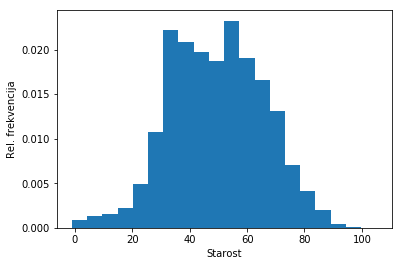

In [50]:
plt.hist(df_copy['STAROST'], density = True, bins=20)
plt.ylabel('Rel. frekvencija');
plt.xlabel('Starost');

In [51]:
prijevremeni_raskidi = df_copy.loc[ df_copy['PRIJEVREMENI_RASKID'] == 'Y', : ]
neprijevremeni_raskidi = df_copy.loc[ df_copy['PRIJEVREMENI_RASKID'] == 'N', : ]

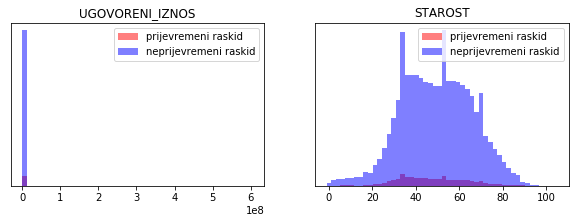

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
ax = axes.ravel() # axes are 2-dimensional so we unfold them

i = 3 
_, bins = np.histogram(df_copy.iloc[:,i], bins=50)
ax[0].hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax[0].hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax[0].set_title(df_copy.columns.values[i])
ax[0].set_yticks(()) # remove ticks on y-axis
ax[0].legend(loc='upper right')

i = 10
_, bins = np.histogram(df_copy.iloc[:,i], bins=50)
ax[1].hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax[1].hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax[1].set_title(df_copy.columns.values[i])
ax[1].set_yticks(()) # remove ticks on y-axis
ax[1].legend(loc='upper right')



Još i u početku analize se može primijetiti da postoje ekstremne vrijednosti u stupcu 'UGOVORENI_IZNOS', što dolazi do izražaja u histogramu.

Iz drugog histograma vidimo da značajka 'STAROST' ne razdvaja dobro klase sama po sebi što je i očekivano.




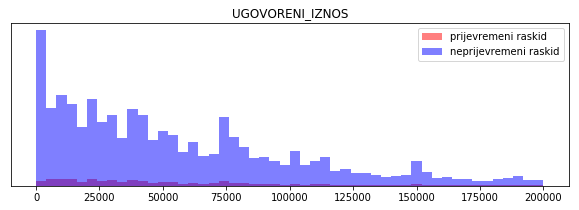

In [73]:
# izdvajamo podatke gdje ugovoreni iznos nije ekstreman radi bolje vizualizacije
subdf = df_copy[df_copy['UGOVORENI_IZNOS'] < 2e5]
prijevremeni_raskidi = subdf.loc[ subdf['PRIJEVREMENI_RASKID'] == 'Y', : ]
neprijevremeni_raskidi = subdf.loc[ subdf['PRIJEVREMENI_RASKID'] == 'N', : ]


fig, ax = plt.subplots(1, 1, figsize=(10, 3))

i = 3 
_, bins = np.histogram(subdf.iloc[:,i], bins=50)
ax.hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax.hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax.set_title(subdf.columns.values[i])
ax.set_yticks(()) # remove ticks on y-axis
ax.legend(loc='upper right')

Na gornjem histogramu bolje uočavamo odnos klasa ovisno o ugovorenom iznosu. Također zaključujemo da ta značajka sama po sebi ne razdvaja dobro klase, ali to samo potvrđuje naše mišljenje.

In [74]:
df_copy.columns

Index(['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA', 'UGOVORENI_IZNOS',
       'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA',
       'VISINA_KAMATE', 'TIP_KAMATE', 'STAROST', 'PRIJEVREMENI_RASKID'],
      dtype='object')

In [76]:
categoric_var = ['VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA', 'TIP_KAMATE'] 
table = df_copy.crosstab(columns = "count")      # Name the count column

my_tab.plot.bar()

AttributeError: 'DataFrame' object has no attribute 'crosstab'